In [1]:
from astropy.io import fits
import numpy as np
import datetime
import pandas as pd

import glob #para linux
from glob import os #para windows

import matplotlib.pyplot as plt
import subprocess

from time import sleep
import sys

from astropy.visualization import (HistEqStretch, simple_norm, ImageNormalize, imshow_norm, MinMaxInterval, LogStretch)
from sklearn import preprocessing
import matplotlib.animation as animation

In [2]:
# Ordenar (por nombre) los archivos en una lista para posterior consulta
#pathToFiles = '../DATA'
pathToFiles = 'DATA'
orderedList = sorted(glob.glob(os.path.join(pathToFiles, '*.fts')))
contador=0
for filename in orderedList:
    contador+=1
print("\nExisten {} archivos fts".format(contador))



Existen 46 archivos fts


In [3]:
# Obtener lista de datos que son 2048x2048
listaDatos = []
for filename in orderedList:
  hdulist = fits.open(filename)
  data = hdulist[0].data
  hdulist.close
  if data.shape == (2048, 2048):
    listaDatos.append(filename)
print("\nDe los cuales {} son  de tamaño 2048 x 2048".format(len(listaDatos)))



De los cuales 45 son  de tamaño 2048 x 2048


In [4]:
hdulist1 = fits.open(listaDatos[39])
headerList = hdulist1[0].header
hdulist1.close()

maph=pd.DataFrame(columns=headerList)
maph

,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,DATE-OBS,FILEORIG,SEB_PROG,SYNC,...,FPSDAS3,FPSDAQ1,FPSDAQ2,FPSDAQ3,DATAMDN,HISTORY,HISTORY,HISTORY,HISTORY,HISTORY


In [5]:
#maph=pd.DataFrame()
cel =[]
for i in range(40):
    hdulist1 = fits.open(listaDatos[i])
    headerList = hdulist1[0].header
    hdulist1.close()
    for headerInplace in headerList:
        cel.append(headerList[headerInplace])
    maph.loc[i]=cel
    cel=[]


In [6]:
maph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Columns: 253 entries, SIMPLE to HISTORY
dtypes: bool(9), float64(88), int64(92), object(64)
memory usage: 76.9+ KB


In [7]:
#maph['DATE-OBS']

In [8]:
#maph['EXPTIME']

In [9]:
tama=len(listaDatos)
tama

45

In [10]:
expTime=maph.EXPTIME
mExpTime=np.mean(expTime)

In [11]:
#indexExp=
maph[maph.EXPTIME>=mExpTime-1.5][maph.EXPTIME<=mExpTime+1.5]

,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,DATE-OBS,FILEORIG,SEB_PROG,SYNC,...,FPSDAS3,FPSDAQ1,FPSDAQ2,FPSDAQ3,DATAMDN,HISTORY,HISTORY,HISTORY,HISTORY,HISTORY
0,True,16,2,2048,2048,True,2018-11-10T10:24:00.005,IB10028D.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
1,True,16,2,2048,2048,True,2018-11-10T10:54:00.005,IB1002C9.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
2,True,16,2,2048,2048,True,2018-11-10T11:24:00.005,IB1002GE.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
3,True,16,2,2048,2048,True,2018-11-10T11:54:00.005,IB1002K9.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
4,True,16,2,2048,2048,True,2018-11-10T12:24:00.005,IB1002NW.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
5,True,16,2,2048,2048,True,2018-11-10T12:54:00.005,IB1002RS.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
6,True,16,2,2048,2048,True,2018-11-10T13:24:00.005,IB1002VX.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
7,True,16,2,2048,2048,True,2018-11-10T13:54:00.006,IB1002ZS.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
8,True,16,2,2048,2048,True,2018-11-10T14:24:00.005,IB10033F.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
9,True,16,2,2048,2048,True,2018-11-10T14:54:00.009,IB10037B.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."


In [12]:
stdExpTime=np.std(maph.EXPTIME)
stdExpTime

7.754837200012196e-06

In [13]:
maph[(maph.EXPTIME >= (mExpTime - stdExpTime)) & (maph.EXPTIME <= (mExpTime + stdExpTime))]

,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,DATE-OBS,FILEORIG,SEB_PROG,SYNC,...,FPSDAS3,FPSDAQ1,FPSDAQ2,FPSDAQ3,DATAMDN,HISTORY,HISTORY,HISTORY,HISTORY,HISTORY
0,True,16,2,2048,2048,True,2018-11-10T10:24:00.005,IB10028D.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
1,True,16,2,2048,2048,True,2018-11-10T10:54:00.005,IB1002C9.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
3,True,16,2,2048,2048,True,2018-11-10T11:54:00.005,IB1002K9.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
4,True,16,2,2048,2048,True,2018-11-10T12:24:00.005,IB1002NW.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
5,True,16,2,2048,2048,True,2018-11-10T12:54:00.005,IB1002RS.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
7,True,16,2,2048,2048,True,2018-11-10T13:54:00.006,IB1002ZS.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
8,True,16,2,2048,2048,True,2018-11-10T14:24:00.005,IB10033F.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
9,True,16,2,2048,2048,True,2018-11-10T14:54:00.009,IB10037B.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
10,True,16,2,2048,2048,True,2018-11-10T15:24:00.007,IB1003BG.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."
11,True,16,2,2048,2048,True,2018-11-10T15:54:00.006,IB1003FB.411,DOUBLE,False,...,0,0,0,0,2468.0,"[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...","[Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37..."


In [14]:
maph = maph[(maph.EXPTIME >= (mExpTime - stdExpTime)) & (maph.EXPTIME <= (mExpTime + stdExpTime))]
tama = len(maph)
tama

35

In [15]:
maph.loc[0]

SIMPLE                                                  True
BITPIX                                                    16
NAXIS                                                      2
NAXIS1                                                  2048
NAXIS2                                                  2048
                                 ...                        
HISTORY    [Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...
HISTORY    [Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...
HISTORY    [Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...
HISTORY    [Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...
HISTORY    [Id: make_scc_hdr.pro,v 1.178 2018/01/30 15:37...
Name: 0, Length: 253, dtype: object

In [16]:
mitad=1 #esto es para elegir el tamaño de la imagen 2 -> 512; 1 -> 1024
xc=maph.loc[0].CRPIX1/mitad
yc=maph.loc[0].CRPIX2/mitad
print("xc = {}".format(xc))
print("yc = {}".format(yc))

xc = 1027.0
yc = 1028.2


In [17]:
for i in maph:
    if i == 'R_SUN':
        print("R_SUN existe")
    elif i == 'RSUN':
        print("RSUN existe")

RSUN existe


In [18]:
for header in maph:
    if header == 'R_SUN':
        r0=maph.loc[0].R_SUN/(maph.loc[0].CDELT1*mitad)
    elif header == 'RSUN':
        r0=maph.loc[0].RSUN/(maph.loc[0].CDELT1*mitad)

r0_20=20.*r0
r0_19=19.*r0
r0_15=15.*r0
r0_10=10.*r0

In [19]:
print("r0_20 = {}".format(r0_20))
print("r0_19 = {}".format(r0_19))
print("r0_15 = {}".format(r0_15))
print("r0_10 = {}".format(r0_10))

r0_20 = 1364.4457716190345
r0_19 = 1296.2234830380828
r0_15 = 1023.3343287142759
r0_10 = 682.2228858095173


In [20]:
maph.loc[10:20]['DATE-OBS']

10    2018-11-10T15:24:00.007
11    2018-11-10T15:54:00.006
12    2018-11-10T16:23:59.991
14    2018-11-10T17:54:00.005
15    2018-11-10T18:24:00.005
16    2018-11-10T18:54:00.005
17    2018-11-10T19:24:00.010
18    2018-11-10T19:54:00.006
19    2018-11-10T20:24:00.005
20    2018-11-10T20:54:00.005
Name: DATE-OBS, dtype: object

In [21]:
primera_obs = maph.loc[0]['DATE-OBS']
type(primera_obs)

str

In [22]:
import datetime
df_tiempo=pd.to_datetime(maph['DATE-OBS'])
#tiempo_3_obs = maph.loc[2]['DATE-OBS'] - maph.loc[0]['DATE-OBS']
#tiempo_3_obs = df_tiempo[2]-df_tiempo[0]
#tiempo_3_obs
#df_tiempo[2] - df_tiempo[0]
#df_tiempo[0]

In [23]:
df_tiempo[5]

Timestamp('2018-11-10 12:54:00.005000')

In [24]:
delta = df_tiempo[14]-df_tiempo[0]
delta

Timedelta('0 days 07:30:00')

In [25]:
delta.seconds

27000

In [26]:
type(delta)

pandas._libs.tslibs.timedeltas.Timedelta

In [27]:
segundos = int(delta.seconds)
segundos

27000

In [28]:
type(segundos)

int

In [29]:
tiempos = [maph['DATE-OBS']]
header = ["DATE-OBS"]
df_tiempo = pd.concat(tiempos, axis = 1, keys = header)
df_tiempo.head()

,DATE-OBS
0,2018-11-10T10:24:00.005
1,2018-11-10T10:54:00.005
3,2018-11-10T11:54:00.005
4,2018-11-10T12:24:00.005
5,2018-11-10T12:54:00.005


In [30]:
tiempos=pd.to_datetime(df_tiempo['DATE-OBS'])
t0 = tiempos[0] # Esto fallará si se filtro el FITfile con el indice 0
delta = []
for celda in tiempos:
    delta.append((celda - t0).total_seconds())
delta

[0.0,
 1800.0,
 5400.0,
 7200.0,
 9000.0,
 12600.001,
 14400.0,
 16200.004,
 18000.002,
 19800.001,
 21599.986,
 27000.0,
 28800.0,
 30600.0,
 32400.005,
 34200.001,
 36000.0,
 37800.0,
 39600.0,
 41400.0,
 43200.004,
 45000.003,
 46800.001,
 48600.002,
 50400.0,
 52200.0,
 57599.999,
 59400.0,
 61200.0,
 63000.001,
 64800.001,
 66600.001,
 68400.005,
 70200.004,
 72000.001]

In [31]:
df_tiempo['SECONDS'] = delta
df_tiempo.head()

,DATE-OBS,SECONDS
0,2018-11-10T10:24:00.005,0.0
1,2018-11-10T10:54:00.005,1800.0
3,2018-11-10T11:54:00.005,5400.0
4,2018-11-10T12:24:00.005,7200.0
5,2018-11-10T12:54:00.005,9000.0


In [32]:
dx = maph.loc[0]['CDELT1']*1
dx

14.6999998093

In [33]:
angulo=79.0
n_puntos=100
#ang_inc=3.0
ang_inc=0.5
print('centro = {}, {}'.format(xc,yc))

centro = 1027.0, 1028.2


In [34]:
if maph.loc[0].DETECTOR == 'COR2': #para stereo
    rrin=3
    rrfin=15
else:
    rrin=6
    rrfin=15
rrin

3

In [35]:
def radios_calc2(ang,delta_ang,rsol,xcent,ycent,ri,rf,np): #rradarr,radios
    pa_m = 90.0 + angulo
    m=np.tan((pa_m)*np.pi/180.0)
#   rr=intarr(npoints,2,11) & rrt=intarr(npoints,2,11)
    rr=rrt=np.zeros((11,2,npoints),dtype=int)
    rr=np.zeros((11,2,npoints),dtype=int)


    pass

    

In [36]:
rr=rrt=np.zeros((11,2,n_puntos),dtype=int)
rrt

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

#### Función para hacer un arreglo entero como en idl

In [37]:
def intarr(*shape):
    """
    Create an integer array filled with zeros.
    """
    return fltarr(*shape, dtype=int)
#intarr(4)

In [38]:
def fltarr(a,b,c):
    """
    FLTARR(a, b, c)    -> np.zeros((c, b, a))
    """        
    return np.zeros((c,b,a))

fltarr(4,3,2)

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [39]:
np.zeros((11,2,100), dtype=int)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

In [40]:
#        FLTARR(a, b, c)    -> np.zeros((c, b, a))
rradarr = np.zeros((2, 3, 4))
rradarr

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [41]:
#radios_calc2(angulo,ang_inc,r0,xc,yc,rrin,rrfin,n_puntos)

Función `indgen(5)` equivale a `np.arange(5)`

In [42]:
#radios = fltarr(n_puntos)
radios = np.zeros(n_puntos)
radios

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
rads = np.linspace(3,15,100)
rads

array([ 3.        ,  3.12121212,  3.24242424,  3.36363636,  3.48484848,
        3.60606061,  3.72727273,  3.84848485,  3.96969697,  4.09090909,
        4.21212121,  4.33333333,  4.45454545,  4.57575758,  4.6969697 ,
        4.81818182,  4.93939394,  5.06060606,  5.18181818,  5.3030303 ,
        5.42424242,  5.54545455,  5.66666667,  5.78787879,  5.90909091,
        6.03030303,  6.15151515,  6.27272727,  6.39393939,  6.51515152,
        6.63636364,  6.75757576,  6.87878788,  7.        ,  7.12121212,
        7.24242424,  7.36363636,  7.48484848,  7.60606061,  7.72727273,
        7.84848485,  7.96969697,  8.09090909,  8.21212121,  8.33333333,
        8.45454545,  8.57575758,  8.6969697 ,  8.81818182,  8.93939394,
        9.06060606,  9.18181818,  9.3030303 ,  9.42424242,  9.54545455,
        9.66666667,  9.78787879,  9.90909091, 10.03030303, 10.15151515,
       10.27272727, 10.39393939, 10.51515152, 10.63636364, 10.75757576,
       10.87878788, 11.        , 11.12121212, 11.24242424, 11.36

In [44]:
nr = len(rads)
nr

100

In [45]:
#gap = 7
#gap_angle = np.arange(gap*-1, gap+1)
gap_angle = np.arange(-5,6)
gap_angle

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [46]:
for j in gap_angle:
    print(j)

-5
-4
-3
-2
-1
0
1
2
3
4
5


In [47]:
index = np.arange(100)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [48]:
rr.shape

(11, 2, 100)

In [49]:
rr

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

In [158]:
angulo = 81
ang_inc = 3
PA_m = angulo + 90
rsol = r0
for j in gap_angle:
    for i in index:
        rd = rads[i]
        radios[i] = rd
        radio=rsol * rd
        teta = (PA_m + ang_inc * j)*np.pi/180
        #teta = (169 + 1 * j)*np.pi/180
        #teta = (46 + 3 * j)*np.pi/180
        x = radio * np.cos(teta) + xc
        y = radio * np.sin(teta) + yc
        if x < 0 or y < 0:
            print(i, x, y)
        rr[j+5][0][i]=x
        rr[j+5][1][i]=y
rr

array([[[ 840,  832,  824, ...,  107,   99,   92],
        [1111, 1114, 1118, ..., 1437, 1441, 1444]],

       [[ 835,  828,  820, ...,   87,   79,   71],
        [1101, 1104, 1107, ..., 1389, 1391, 1394]],

       [[ 832,  824,  816, ...,   69,   61,   53],
        [1091, 1094, 1096, ..., 1339, 1341, 1344]],

       ...,

       [[ 822,  814,  805, ...,   20,   11,    3],
        [1028, 1028, 1028, ..., 1028, 1028, 1028]],

       [[ 822,  814,  806, ...,   21,   13,    5],
        [1017, 1017, 1016, ...,  975,  975,  974]],

       [[ 823,  815,  807, ...,   25,   17,    9],
        [1006, 1005, 1005, ...,  922,  922,  921]]])

In [159]:
r0

68.22228858095173

In [160]:
rr.shape

(11, 2, 100)

In [161]:
#rr.T.shape

In [162]:
#rr = rr.T
#rr.shape

In [163]:
#rr[:,1,0]
#plt.plot(rr[:,0,0],rr[:,1,0])
len(rr)

11

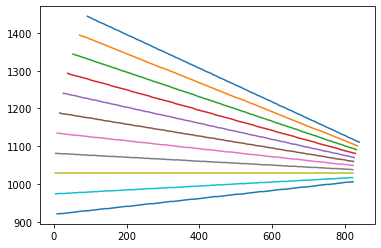

In [164]:
for i in np.arange(len(rr)):
    plt.plot(rr[i,0,:],rr[i,1,:])
plt.show()

In [236]:
#help(preprocessing.normalize)
#help(plt.plot)

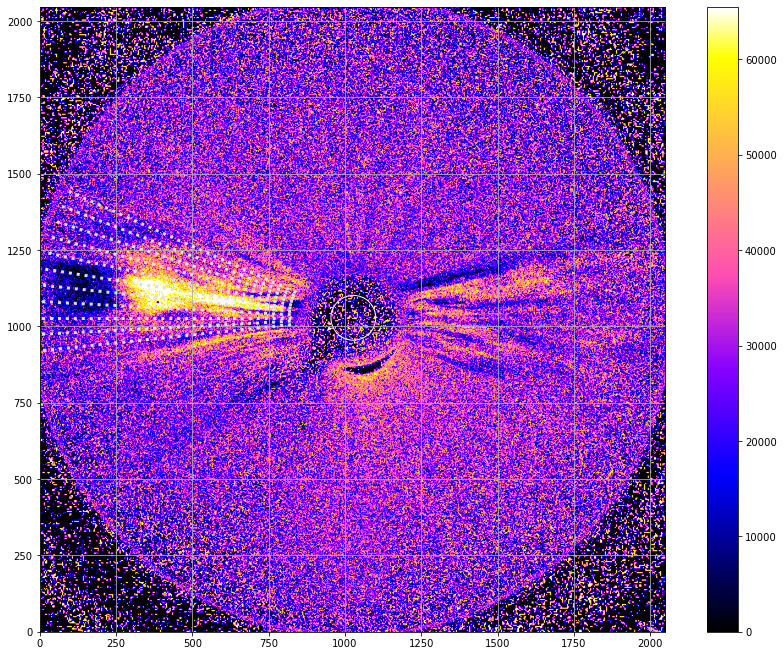

In [264]:
hdulist_a = fits.open(listaDatos[32])
datatemp_a = hdulist_a[0].data
hdulist_a.close()

hdulist_b = fits.open(listaDatos[36])
datatemp_b = hdulist_b[0].data
hdulist_b.close()

datatemp_dif = datatemp_b - datatemp_a

# Normalizar la diferencia
normalized_data = preprocessing.normalize(datatemp_dif, norm='max')

fig = plt.figure(figsize = (15,11.5))
ax = fig.add_subplot(1, 1, 1)
im, norm = imshow_norm(datatemp_dif, ax, origin='lower',
                        #cmap='plasma')#,
                        cmap='gnuplot2')#,
                        #cmap='CMRmap')#,
                        #cmap='viridis')#,
                        #cmap='inferno_r',
                        #cmap='magma_r',
                        #stretch=LogStretch())
                        #stretch=HistEqStretch(normalized_data))
ax.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='w')
for j in np.arange(len(rr)):
    ax.plot(rr[j,0,:],rr[j,1,:], marker='', ls=':', lw='3', color='#dfdfdf')
ax.grid()
#plt.plot()
#fig.suptitle("Test")
fig.colorbar(im)

In [173]:
#help(imshow_norm)

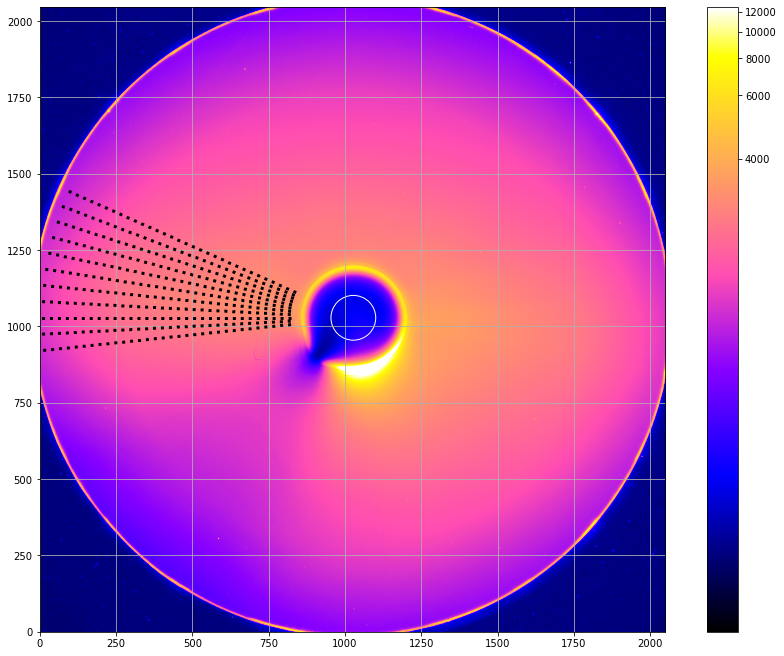

In [261]:
hdulist = fits.open(listaDatos[34])
datatemp = hdulist[0].data
hdulist.close()
fig = plt.figure(figsize = (15,11.5))
#fig = plt.figure(figsize = (20,14))
ax = fig.add_subplot(1, 1, 1)

normalized_data = preprocessing.normalize(datatemp)
im, norm = imshow_norm(datatemp, ax, origin='lower',
                        cmap='gnuplot2',
                        #cmap='plasma',#,
                        stretch=LogStretch())
                        #stretch=HistEqStretch(normalized_data))

#plt.plot(xc, yc, 'o', markersize=2*maph.CDELT1.iloc[30], color='black')
#plt.plot(xc, yc, 'o', markersize=4*maph.RSUN.iloc[30]/96, color='black')
plt.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='w')
for i in np.arange(len(rr)):
    plt.plot(rr[i,0,:],rr[i,1,:], marker='', ls=':', lw='3', color='#000000')
    #plt.plot(rr[i,0,:],rr[i,1,:], "w--")
    
plt.grid()
#fig.suptitle("Test con Fit1")
fig.colorbar(im)
#fig.savefig('plot_radios.png')

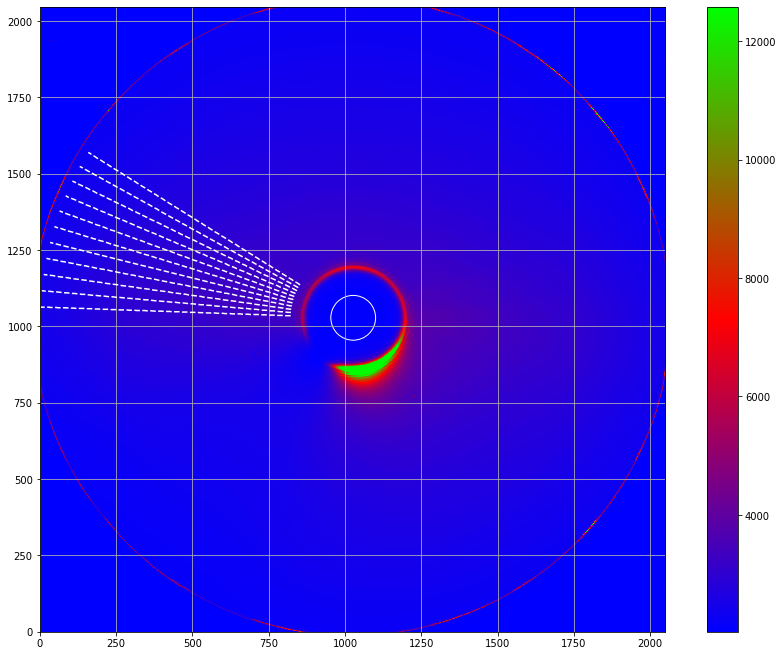

In [59]:
hdulist = fits.open(listaDatos[30])
datatemp = hdulist[0].data
hdulist.close()
fig = plt.figure(figsize = (15,11.5))
#fig = plt.figure(figsize = (20,14))
ax = fig.add_subplot(1, 1, 1)
im, norm = imshow_norm(datatemp, ax, origin='lower',
                        cmap='brg')#,
                        #stretch=LogStretch())
#plt.plot(xc, yc, 'o', markersize=2*maph.CDELT1.iloc[30], color='black')
#plt.plot(xc, yc, 'o', markersize=4*maph.RSUN.iloc[30]/96, color='black')
plt.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='w')
for i in np.arange(len(rr)):
    plt.plot(rr[i,0,:],rr[i,1,:], "w--")
plt.grid()
#fig.suptitle("Test con Fit1")
fig.colorbar(im)
#fig.savefig('plot_radios.png')

In [60]:
np.std(maph.RSUN/maph.CDELT1)

4.160042315835747e-05

In [61]:
max(maph.RSUN/maph.CDELT1)-min(maph.RSUN/maph.CDELT1)

0.00014091360726808944

In [62]:
maph.CDELT1.iloc[30]

14.6999998093

In [63]:
maph.RSUN.iloc[30]/maph.CDELT1.iloc[30]

68.22241959251805

In [64]:
maph.RSUN.iloc[30]

1002.869555

In [65]:
len(rr)

11

In [66]:
tetas = np.arange(360)*np.pi/180
print(len(tetas))
tetas

360


array([0.        , 0.01745329, 0.03490659, 0.05235988, 0.06981317,
       0.08726646, 0.10471976, 0.12217305, 0.13962634, 0.15707963,
       0.17453293, 0.19198622, 0.20943951, 0.2268928 , 0.2443461 ,
       0.26179939, 0.27925268, 0.29670597, 0.31415927, 0.33161256,
       0.34906585, 0.36651914, 0.38397244, 0.40142573, 0.41887902,
       0.43633231, 0.45378561, 0.4712389 , 0.48869219, 0.50614548,
       0.52359878, 0.54105207, 0.55850536, 0.57595865, 0.59341195,
       0.61086524, 0.62831853, 0.64577182, 0.66322512, 0.68067841,
       0.6981317 , 0.71558499, 0.73303829, 0.75049158, 0.76794487,
       0.78539816, 0.80285146, 0.82030475, 0.83775804, 0.85521133,
       0.87266463, 0.89011792, 0.90757121, 0.9250245 , 0.9424778 ,
       0.95993109, 0.97738438, 0.99483767, 1.01229097, 1.02974426,
       1.04719755, 1.06465084, 1.08210414, 1.09955743, 1.11701072,
       1.13446401, 1.15191731, 1.1693706 , 1.18682389, 1.20427718,
       1.22173048, 1.23918377, 1.25663706, 1.27409035, 1.29154

In [67]:
len(listaDatos)

40

In [68]:
listaDatos

['DATA\\20181110_102400_d4c2A.fts',
 'DATA\\20181110_105400_d4c2A.fts',
 'DATA\\20181110_112400_d4c2A.fts',
 'DATA\\20181110_115400_d4c2A.fts',
 'DATA\\20181110_122400_d4c2A.fts',
 'DATA\\20181110_125400_d4c2A.fts',
 'DATA\\20181110_132400_d4c2A.fts',
 'DATA\\20181110_135400_d4c2A.fts',
 'DATA\\20181110_142400_d4c2A.fts',
 'DATA\\20181110_145400_d4c2A.fts',
 'DATA\\20181110_152400_d4c2A.fts',
 'DATA\\20181110_155400_d4c2A.fts',
 'DATA\\20181110_162400_d4c2A.fts',
 'DATA\\20181110_172400_d4c2A.fts',
 'DATA\\20181110_175400_d4c2A.fts',
 'DATA\\20181110_182400_d4c2A.fts',
 'DATA\\20181110_185400_d4c2A.fts',
 'DATA\\20181110_192400_d4c2A.fts',
 'DATA\\20181110_195400_d4c2A.fts',
 'DATA\\20181110_202400_d4c2A.fts',
 'DATA\\20181110_205400_d4c2A.fts',
 'DATA\\20181110_212400_d4c2A.fts',
 'DATA\\20181110_215400_d4c2A.fts',
 'DATA\\20181110_222400_d4c2A.fts',
 'DATA\\20181110_225400_d4c2A.fts',
 'DATA\\20181110_232400_d4c2A.fts',
 'DATA\\20181110_235400_d4c2A.fts',
 'DATA\\20181111_002400_d4c2

In [69]:
listaDatosFiltrados = []
for fit_index in maph.index:
    listaDatosFiltrados.append(listaDatos[fit_index])
len(listaDatosFiltrados)

35

In [72]:
def diff(files):
    n = len(files)    
    #n = len(maph.index)
    frames = []
    if n > 0:
        for i in range(n - 1):  # Para desplegar todas las imagenes hacer range(n-1)        
        #for i in maph.index:  # Para desplegar todas las imagenes hacer range(n-1)
            
            # Abrir 2 FITS para restarlos
            hdulistA = fits.open(files[i])
            datosA = hdulistA[0].data
            hdulistA.close()

            hdulistB = fits.open(files[i + 1])
            datosB = hdulistB[0].data
            date = hdulistB[0].header['DATE-OBS']
            hdulistB.close()

            imag_diff = datosB - datosA

            # Normalizar la diferencia
            normalized_data = preprocessing.normalize(imag_diff)

            # Configurar figura con mejora de hist_eq
            fig = plt.figure(figsize=(19.2, 14.4))
            ax = fig.add_subplot(1, 1, 1)
            im, norm = imshow_norm(imag_diff, ax, origin='lower',
                                   cmap='CMRmap_r',                                   
                                   #cmap='brg',
                                   #cmap='gnuplot2',
                                   interval=MinMaxInterval(),
                                   stretch=HistEqStretch(normalized_data))
                                   #stretch=LogStretch())

            # Obtener figrua y archivos .png
            fig.suptitle(date, fontsize=24)
            fig.colorbar(im)
            ax.scatter(xc, yc, s=2*maph.RSUN.iloc[30], facecolors='none', edgecolors='w')
            for j in np.arange(len(rr)):
                ax.plot(rr[j,0,:],rr[j,1,:], "w")
            ax.grid()
            plt.close(fig)
            fig.savefig(pathToFiles + "/file%02d.png" % i)

            # Mostrar porcentaje de avance en consola
            #j = (i + 1) / (n - 1)
            #sys.stdout.write('\r')
            #sys.stdout.write("[%-20s] %d%%" % ('=' * int(20 * j), 100 * j))
            #sys.stdout.flush()
            #sleep(0.25)

    # Obtener video junto a las imágenes .FIT y .png
    print("\n\nArchivos .png generados, Renderizando video...\n")
    os.chdir(pathToFiles)
    subprocess.call([
        'ffmpeg', '-framerate', '4', '-i', 'file%02d.png', '-r', '30', '-pix_fmt', 'yuv420p',
        'video_name.mp4'
    ])
    os.chdir('../')


# return fig
datos_diff = diff(listaDatosFiltrados)
print("\nPrograma Completado")



Archivos .png generados, Renderizando video...


Programa Completado


In [69]:
os.chdir(pathToFiles)
subprocess.call([
    'ffmpeg', '-framerate', '4', '-i', 'file%02d.png', '-r', '30', '-pix_fmt', 'yuv420p',
    'video_name.mp4'
])
os.chdir('../')

In [70]:
rr.shape

(11, 2, 100)

In [71]:
tiempos

0    2018-11-10 10:24:00.005
1    2018-11-10 10:54:00.005
3    2018-11-10 11:54:00.005
4    2018-11-10 12:24:00.005
5    2018-11-10 12:54:00.005
7    2018-11-10 13:54:00.006
8    2018-11-10 14:24:00.005
9    2018-11-10 14:54:00.009
10   2018-11-10 15:24:00.007
11   2018-11-10 15:54:00.006
12   2018-11-10 16:23:59.991
14   2018-11-10 17:54:00.005
15   2018-11-10 18:24:00.005
16   2018-11-10 18:54:00.005
17   2018-11-10 19:24:00.010
18   2018-11-10 19:54:00.006
19   2018-11-10 20:24:00.005
20   2018-11-10 20:54:00.005
21   2018-11-10 21:24:00.005
22   2018-11-10 21:54:00.005
23   2018-11-10 22:24:00.009
24   2018-11-10 22:54:00.008
25   2018-11-10 23:24:00.006
26   2018-11-10 23:54:00.007
27   2018-11-11 00:24:00.005
28   2018-11-11 00:54:00.005
31   2018-11-11 02:24:00.004
32   2018-11-11 02:54:00.005
33   2018-11-11 03:24:00.005
34   2018-11-11 03:54:00.006
35   2018-11-11 04:24:00.006
36   2018-11-11 04:54:00.006
37   2018-11-11 05:24:00.010
38   2018-11-11 05:54:00.009
39   2018-11-1

In [72]:
delta

[0.0,
 1800.0,
 5400.0,
 7200.0,
 9000.0,
 12600.001,
 14400.0,
 16200.004,
 18000.002,
 19800.001,
 21599.986,
 27000.0,
 28800.0,
 30600.0,
 32400.005,
 34200.001,
 36000.0,
 37800.0,
 39600.0,
 41400.0,
 43200.004,
 45000.003,
 46800.001,
 48600.002,
 50400.0,
 52200.0,
 57599.999,
 59400.0,
 61200.0,
 63000.001,
 64800.001,
 66600.001,
 68400.005,
 70200.004,
 72000.001]

In [73]:
df_tiempo['SECONDS']

0         0.000
1      1800.000
3      5400.000
4      7200.000
5      9000.000
7     12600.001
8     14400.000
9     16200.004
10    18000.002
11    19800.001
12    21599.986
14    27000.000
15    28800.000
16    30600.000
17    32400.005
18    34200.001
19    36000.000
20    37800.000
21    39600.000
22    41400.000
23    43200.004
24    45000.003
25    46800.001
26    48600.002
27    50400.000
28    52200.000
31    57599.999
32    59400.000
33    61200.000
34    63000.001
35    64800.001
36    66600.001
37    68400.005
38    70200.004
39    72000.001
Name: SECONDS, dtype: float64

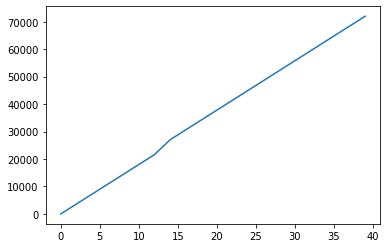

In [74]:
plt.plot(df_tiempo['SECONDS'],)

In [75]:
df_tiempo.head()

,DATE-OBS,SECONDS
0,2018-11-10T10:24:00.005,0.0
1,2018-11-10T10:54:00.005,1800.0
3,2018-11-10T11:54:00.005,5400.0
4,2018-11-10T12:24:00.005,7200.0
5,2018-11-10T12:54:00.005,9000.0


In [76]:
maph.index

Int64Index([ 0,  1,  3,  4,  5,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19,
            20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38,
            39],
           dtype='int64')

In [77]:
len(listaDatosFiltrados)

35

In [78]:
a = np.array([])
a

array([], dtype=float64)

In [79]:
rr.shape

(11, 2, 100)

In [80]:
valorRadioCentral = np.array([])
#for indice in maph.index:
for dato_index in range(len(listaDatosFiltrados)):

    hdulist = fits.open(listaDatosFiltrados[dato_index])
    map = hdulist[0].data
    hdulist.close()
    print(map[rr[5][1][0]][[rr[5][0][0]]])

[3456]
[3468]
[3464]
[3456]
[3470]
[3434]
[3456]
[3444]
[3444]
[3434]
[3428]
[3412]
[3424]
[3410]
[3416]
[3410]
[3402]
[3390]
[3398]
[3394]
[3394]
[3382]
[3398]
[3396]
[3384]
[3396]
[3384]
[3384]
[3390]
[3366]
[3380]
[3376]
[3382]
[3364]
[3358]


[3456. 3468. 3464. 3456. 3470. 3434. 3456. 3444. 3444. 3434. 3428. 3412.
 3424. 3410. 3416. 3410. 3402. 3390. 3398. 3394. 3394. 3382. 3398. 3396.
 3384. 3396. 3384. 3384. 3390. 3366. 3380. 3376. 3382. 3364. 3358.]


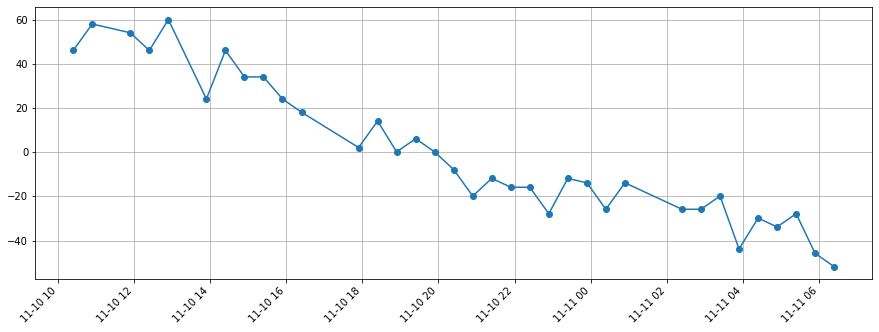

3409.8285714285716


In [81]:
valorRadioCentral = np.array([])
for indice in range(len(listaDatosFiltrados)):
    hdulist = fits.open(listaDatosFiltrados[indice])
    map = hdulist[0].data
    hdulist.close()
    valorRadioCentral = np.append(valorRadioCentral,map[rr[5][1][0]][[rr[5][0][0]]])
brilloProm = np.mean(valorRadioCentral)
print(valorRadioCentral)
valorRadioCentral_diff = valorRadioCentral - brilloProm



from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(15,5))
plt.plot_date(tiempos, valorRadioCentral_diff, linestyle='solid')
plt.xticks(rotation=45,  ha='right')
plt.grid()
plt.show()
print(brilloProm)

In [82]:
valorRadioCentral

array([3456., 3468., 3464., 3456., 3470., 3434., 3456., 3444., 3444.,
       3434., 3428., 3412., 3424., 3410., 3416., 3410., 3402., 3390.,
       3398., 3394., 3394., 3382., 3398., 3396., 3384., 3396., 3384.,
       3384., 3390., 3366., 3380., 3376., 3382., 3364., 3358.])

In [83]:
brilloProm

3409.8285714285716

In [85]:
def moving_average(a, n=5) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [86]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

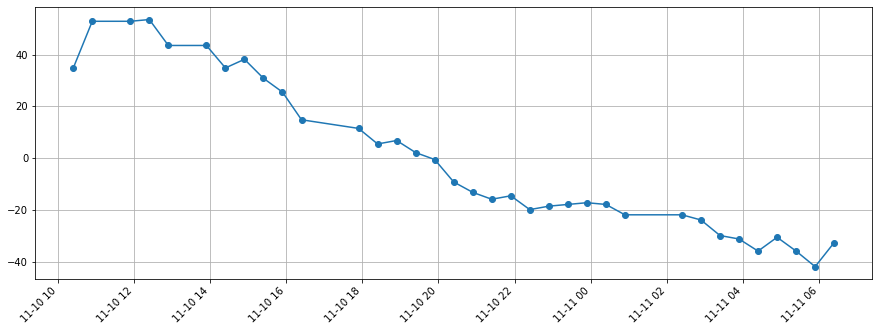

In [87]:
valorRadioCentral = np.array([])
for indice in range(len(listaDatosFiltrados)):
    hdulist = fits.open(listaDatosFiltrados[indice])
    map = hdulist[0].data
    map = map.T
    hdulist.close()
    valorRadioCentral = np.append(valorRadioCentral,map[rr[5][0][0]][[rr[5][1][0]]])
brilloProm = np.mean(valorRadioCentral)
valorRadioCentral = valorRadioCentral - brilloProm

#moving average
valorRadioCentral = movingaverage(valorRadioCentral,3)
#valorRadioCentral = np.append(valorRadioCentral,valorRadioCentral[-1])
#valorRadioCentral = np.append(valorRadioCentral,valorRadioCentral[-1])


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(15,5))
plt.plot_date(tiempos, valorRadioCentral, linestyle='solid')
plt.xticks(rotation=45,  ha='right')
plt.grid()
plt.show()

In [88]:
a = np.arange(200)
a

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [89]:
moving_average(a, n=3)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [90]:
len(moving_average(a, n=3))

198

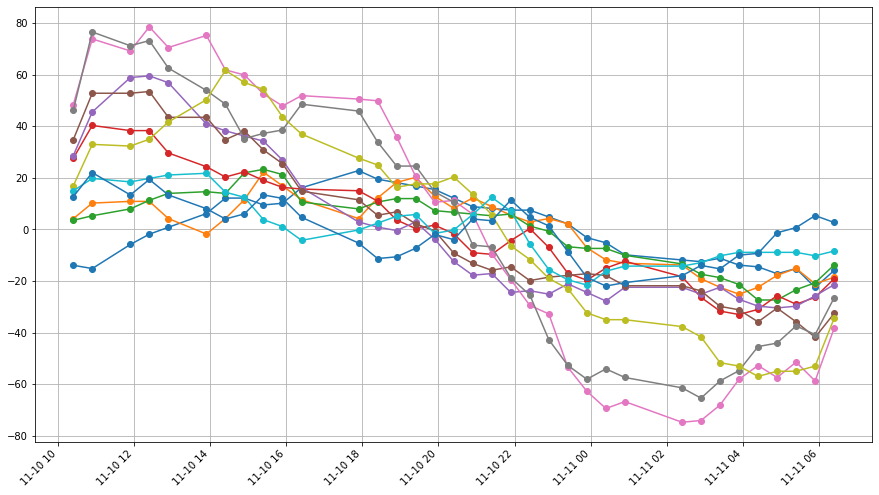

In [91]:
#valorRadioCentral=np.array([])
#valorRadioCentral=np.zeros(11)
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1, 1, 1)
for radio in range(len(rr)):
    valorRadioCentral = np.array([])
    for indice in range(len(listaDatosFiltrados)):
        hdulist = fits.open(listaDatosFiltrados[indice])
        map = hdulist[0].data
        hdulist.close()
        valorRadioCentral = np.append(valorRadioCentral,[map[rr[radio][1][0]][[rr[radio][0][0]]]])
    brilloProm = np.mean(valorRadioCentral)
    valorRadioCentral = valorRadioCentral - brilloProm
    
    #moving average
    valorRadioCentral = movingaverage(valorRadioCentral,3)

    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.plot_date(tiempos, valorRadioCentral, linestyle='solid')
    plt.xticks(rotation=45,  ha='right')
    plt.grid()
plt.show()

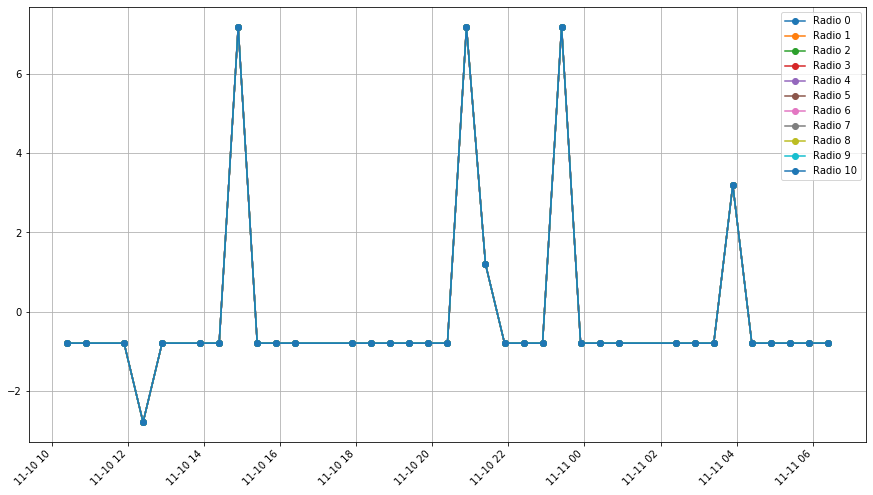

In [90]:
#valorRadioCentral=np.array([])
#valorRadioCentral=np.zeros(11)
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1, 1, 1)
dic_radios={}
for radio in range(len(rr)):
    valorRadioCentral = np.array([])
    for indice in range(len(listaDatosFiltrados)):
        hdulist = fits.open(listaDatosFiltrados[indice])
        map = hdulist[0].data
        hdulist.close()
        valorRadioCentral = np.append(valorRadioCentral,[map[rr[radio][1][0]][[rr[radio][0][0]]]])
    brilloProm = np.mean(valorRadioCentral)
    valorRadioCentral = valorRadioCentral - brilloProm
    dic_radios["radio_No.%s" %radio]=valorRadioCentral
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    ax.plot_date(tiempos, dic_radios["radio_No.%s" %radio], linestyle='solid',label='Radio %s' %radio)
    ax.plot(label = 'radio' + str(radio))
    plt.xticks(rotation=45,  ha='right')
    ax.grid()
ax.legend()
plt.show()

In [134]:
dir(plt.plot_date)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [94]:
def setAngle(angulo, ang_inc, gap):
    #angulo = 73
    #ang_inc = 3
    gap_angle = np.arange(gap*(-1),gap+1)
    rr=rrt=np.zeros((1+gap*2,2,n_puntos),dtype=int)
    PA_m = angulo + 90
    rsol = r0
    for j in gap_angle:
        for i in index:
            rd = rads[i]
            radios[i] = rd
            radio=rsol * rd
            teta = (PA_m + ang_inc * j)*np.pi/180
            x = radio * np.cos(teta) + xc
            y = radio * np.sin(teta) + yc
            if x < 0 or y < 0:
                print(i, x, y)
            rr[j+gap][0][i]=x
            rr[j+gap][1][i]=y
    return rr
rr = setAngle(73,1,7)
print(rr.shape)

(15, 2, 100)


In [109]:
gap = 5
rr=rrt=np.zeros((1+gap*2,2,n_puntos),dtype=int)
rr.shape

(11, 2, 100)

In [110]:
gap_angle

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [111]:
line, = ax.plot([1, 2, 3])
line.set_label('Label via method')
ax.legend()

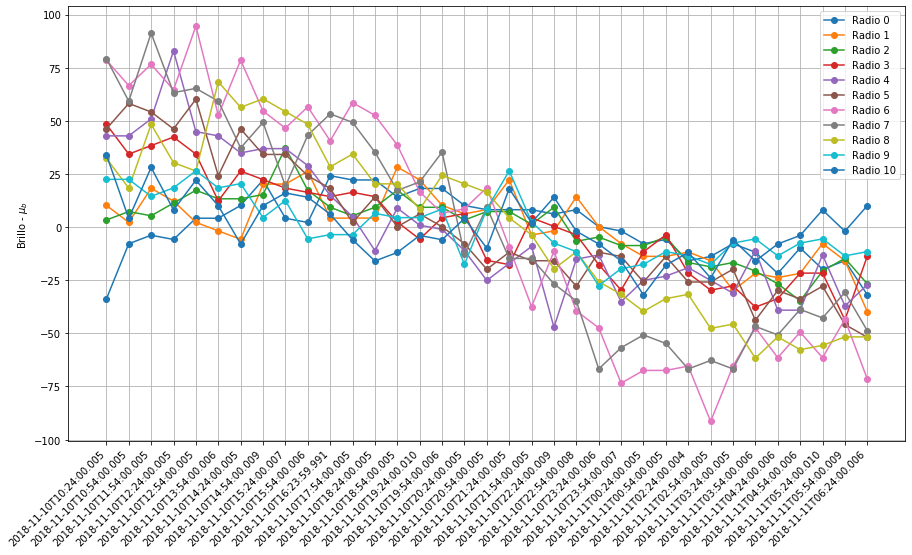

In [92]:
#valorRadioCentral=np.array([])
valorRadioCentral=np.zeros(11)
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1, 1, 1)
dic_radios={}
for radio in range(len(rr)):
    valorRadioCentral = np.array([])
    for indice in range(len(listaDatosFiltrados)):
        hdulist = fits.open(listaDatosFiltrados[indice])
        map = hdulist[0].data
        hdulist.close()
        #valorRadioCentral = np.append(valorRadioCentral,[map[rr[radio][1][0]][[rr[radio][0][0]]]])
        valorRadioCentral = np.append(valorRadioCentral,[map[rr[radio][1][0]][[rr[radio][0][0]]]])
    brilloProm = np.mean(valorRadioCentral)
    valorRadioCentral = valorRadioCentral - brilloProm
    dic_radios["radio_No.%s" %radio]=valorRadioCentral
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    ax.plot_date(df_tiempo['DATE-OBS'], dic_radios["radio_No.%s" %radio], linestyle='solid',label='Radio %s' %radio)
    #ax.plot(label = 'radio' + str(radio))
    plt.xticks(rotation=45,  ha='right')
    ax.grid()
ax.legend()
plt.ylabel("Brillo - $\mu_b$")
plt.show()

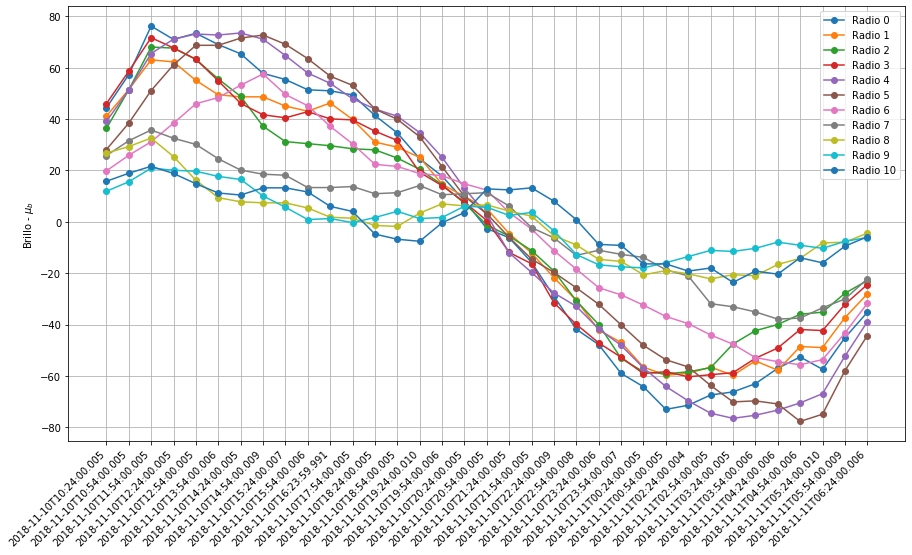

In [95]:
rr = setAngle(81,1,5)
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1, 1, 1)
dic_radios={}
for radio in range(len(rr)):
    valorRadioCentral = np.array([])
    for indice in range(len(listaDatosFiltrados)):
        hdulist = fits.open(listaDatosFiltrados[indice])
        map = hdulist[0].data
        hdulist.close()
        valorRadioCentral = np.append(valorRadioCentral,[map[rr[radio][1][0]][[rr[radio][0][0]]]])
    brilloProm = np.mean(valorRadioCentral)
    valorRadioCentral = valorRadioCentral - brilloProm
    
    #moving average
    valorRadioCentral = movingaverage(valorRadioCentral,5)

    
    dic_radios["radio_No.%s" %radio]=valorRadioCentral
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    ax.plot_date(df_tiempo['DATE-OBS'], dic_radios["radio_No.%s" %radio], linestyle='solid',label='Radio %s' %radio)
    plt.xticks(rotation=45,  ha='right')
    ax.grid()
ax.legend()
plt.ylabel("Brillo - $\mu_b$")
plt.show()

In [96]:
df_tiempo.head()

,DATE-OBS,SECONDS
0,2018-11-10T10:24:00.005,0.0
1,2018-11-10T10:54:00.005,1800.0
3,2018-11-10T11:54:00.005,5400.0
4,2018-11-10T12:24:00.005,7200.0
5,2018-11-10T12:54:00.005,9000.0


In [97]:
df_tiempo.shape

(35, 2)

In [98]:
tiempos.head()

0   2018-11-10 10:24:00.005
1   2018-11-10 10:54:00.005
3   2018-11-10 11:54:00.005
4   2018-11-10 12:24:00.005
5   2018-11-10 12:54:00.005
Name: DATE-OBS, dtype: datetime64[ns]

In [99]:
rr.shape

(11, 2, 100)

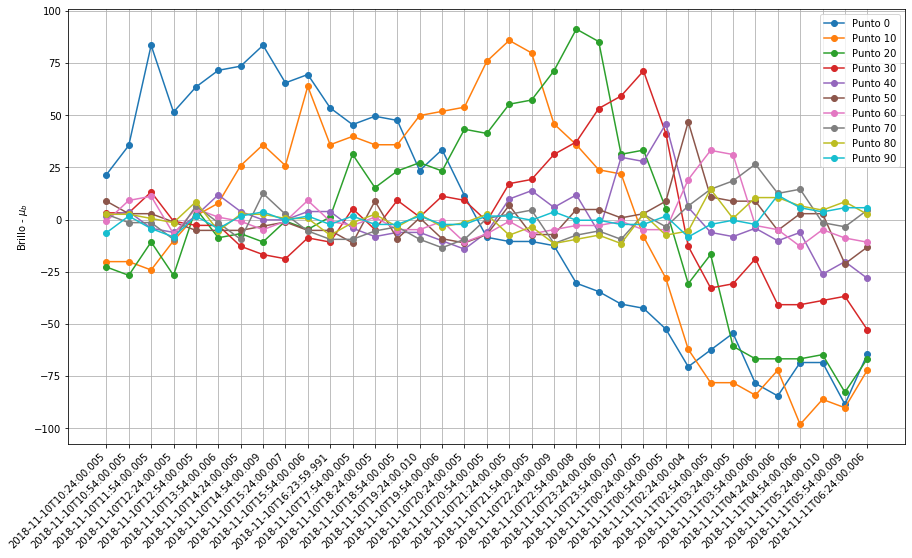

In [102]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1, 1, 1)
dic_radios={}
for radio in range(0,n_puntos,10):
#for radio in range(0,20,2):
    valorRadioCentral = np.array([])
    for indice in range(len(listaDatosFiltrados)):
        hdulist = fits.open(listaDatosFiltrados[indice])
        map = hdulist[0].data
        hdulist.close()
        #valorRadioCentral = np.append(valorRadioCentral,[map[rr[radio][1][0]][[rr[radio][0][0]]]])
        valorRadioCentral = np.append(valorRadioCentral,[map[rr[5][1][radio]][[rr[5][0][radio]]]])
    brilloProm = np.mean(valorRadioCentral)
    valorRadioCentral = valorRadioCentral - brilloProm
    dic_radios["radio_No.%s" %radio]=valorRadioCentral
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    ax.plot_date(df_tiempo['DATE-OBS'], dic_radios["radio_No.%s" %radio], linestyle='solid',label='Punto %s' %radio)
    #ax.plot(label = 'radio' + str(radio))
    plt.xticks(rotation=45,  ha='right')
ax.grid()
ax.legend()
plt.ylabel("Brillo - $\mu_b$")
plt.show()

In [103]:
if (len(df_tiempo['DATE-OBS']) == len(tiempos)):
    print("tienen el mismo tamaño")
else:
    print("son diferentes")


tienen el mismo tamaño


In [104]:
len(df_tiempo['DATE-OBS'])

35

In [105]:
len(tiempos)

35

In [106]:
a_list = list(range(1, 99, 5))

print(a_list)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]


In [107]:
n_puntos

100

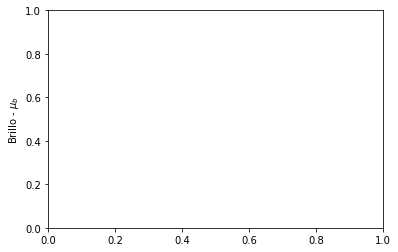

In [108]:
plt.ylabel("Brillo - $\mu_b$")
plt.show()

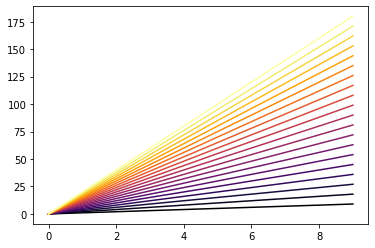

In [109]:
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 20

cm = plt.get_cmap('inferno')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure()
ax = fig.add_subplot(111)
# old way:
#ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# new way:
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    ax.plot(np.arange(10)*(i+1))

#fig.savefig('moreColors.png')
plt.show()


In [110]:
#librerias para iterar colores xd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.cm as mplcm
import matplotlib.colors as colors

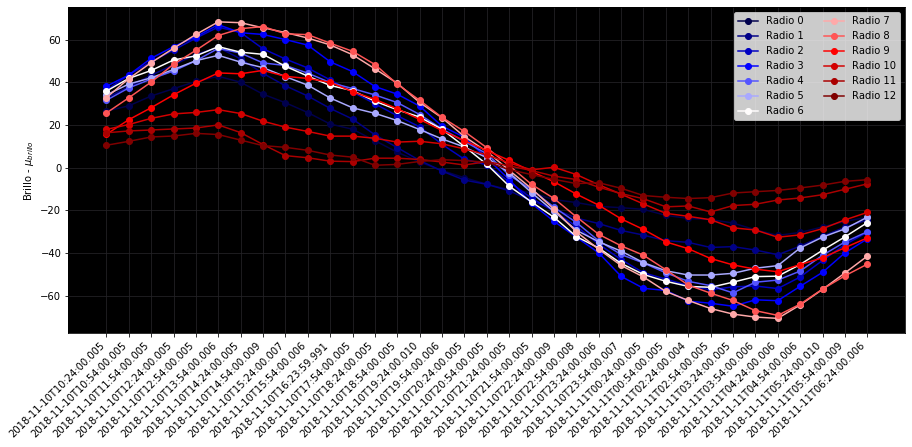

In [111]:
rr = setAngle(79,1,6)
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1, 1, 1)
dic_radios={}

NUM_COLORS = len(rr)
cm = plt.get_cmap('seismic')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

for radio in range(len(rr)):
    valorRadioCentral = np.array([])
    for indice in range(len(listaDatosFiltrados)):
        hdulist = fits.open(listaDatosFiltrados[indice])
        map = hdulist[0].data
        hdulist.close()
        valorRadioCentral = np.append(valorRadioCentral,[map[rr[radio][1][0]][[rr[radio][0][0]]]])
    brilloProm = np.mean(valorRadioCentral)
    valorRadioCentral = valorRadioCentral - brilloProm
    
    #moving average
    valorRadioCentral = movingaverage(valorRadioCentral,10)

    dic_radios["radio_No.%s" %radio]=valorRadioCentral
    
    #from pandas.plotting import register_matplotlib_converters
    #register_matplotlib_converters()
    
    #iteración de colores
    ax.set_prop_cycle(color=[scalarMap.to_rgba(radio)])
    
    #graficar
    ax.plot_date(df_tiempo['DATE-OBS'], 
                 dic_radios["radio_No.%s" %radio], 
                 linestyle='solid',
                 label='Radio %s' %radio)
    #ax.plot(label = 'radio' + str(radio))
    plt.xticks(rotation=45,  ha='right')

#iteración de colores
#ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])
ax.grid(color = "#242326")
ax.legend(ncol=2)
#ax.set_facecolor('tab:gray')
ax.set_facecolor('black')
#ax.set_facecolor('xkcd:sky blue')
plt.ylabel("Brillo - $\mu_{brillo}$")
plt.show()

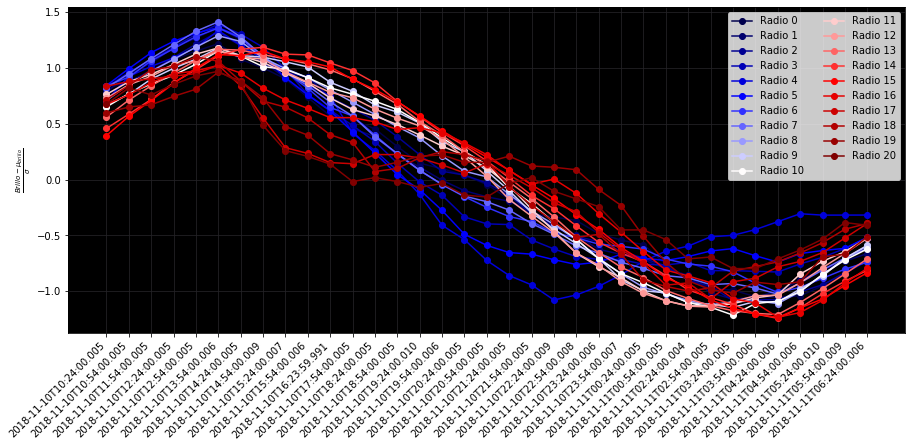

In [124]:
rr = setAngle(77,1,10)
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1, 1, 1)
dic_radios={}

NUM_COLORS = len(rr)
cm = plt.get_cmap('seismic')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

for radio in range(len(rr)):
    valorRadioCentral = np.array([])
    for indice in range(len(listaDatosFiltrados)):
        hdulist = fits.open(listaDatosFiltrados[indice])
        map = hdulist[0].data
        hdulist.close()
        valorRadioCentral = np.append(valorRadioCentral,[map[rr[radio][1][0]][[rr[radio][0][0]]]])
    brilloProm = np.mean(valorRadioCentral)
    brilloStd = np.std(valorRadioCentral)
    valorRadioCentral = (valorRadioCentral - brilloProm)/brilloStd
    #valorRadioCentral = valorRadioCentral - brilloProm
    
    #moving average
    valorRadioCentral = movingaverage(valorRadioCentral,10)
    #valorRadioCentral = moving_average(valorRadioCentral,3)
    #valorRadioCentral = np.append(valorRadioCentral,valorRadioCentral[-1])
    #valorRadioCentral = np.append(valorRadioCentral,valorRadioCentral[-1])

    dic_radios["radio_No.%s" %radio]=valorRadioCentral
    
    #from pandas.plotting import register_matplotlib_converters
    #register_matplotlib_converters()
    
    #iteración de colores
    ax.set_prop_cycle(color=[scalarMap.to_rgba(radio)])
    
    #graficar
    ax.plot_date(df_tiempo['DATE-OBS'], dic_radios["radio_No.%s" %radio], linestyle='solid',label='Radio %s' %radio)
    #ax.plot(label = 'radio' + str(radio))
    plt.xticks(rotation=45,  ha='right')

#iteración de colores
#ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])
ax.grid(color = "#242326")
ax.legend(ncol=2)
#ax.set_facecolor('tab:gray')
ax.set_facecolor('black')
#ax.set_facecolor('xkcd:sky blue')
plt.ylabel(r"$\frac{Brillo - \mu_{brillo}}{\sigma}$")
plt.show()

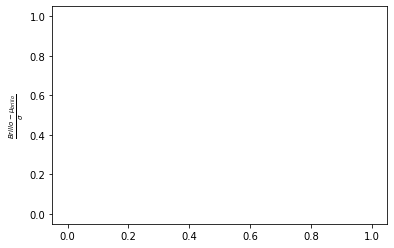

In [112]:
plt.plot()
#plt.ylabel("Brillo - $\mu_{brillo}$")
#plt.ylabel(r"$\frac{\mu_{brillo}}{2}$")
plt.ylabel(r"$\frac{Brillo - \mu_{brillo}}{\sigma}$")
plt.show()

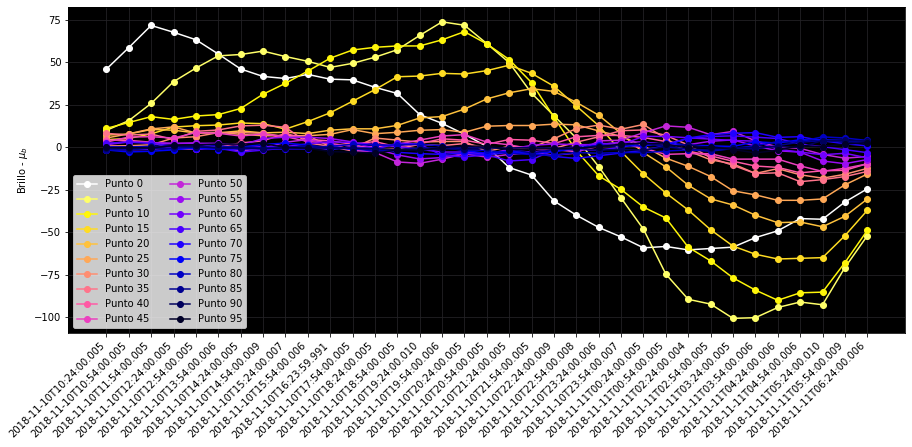

In [113]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1, 1, 1)
dic_radios={}

NUM_COLORS = 100
cm = plt.get_cmap('gnuplot2_r')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

for radio in range(0,n_puntos,5):
#for radio in range(0,20,2):
    valorRadioCentral = np.array([])
    for indice in range(len(listaDatosFiltrados)):
        hdulist = fits.open(listaDatosFiltrados[indice])
        map = hdulist[0].data
        hdulist.close()
        #valorRadioCentral = np.append(valorRadioCentral,[map[rr[5][1][radio]][[rr[5][0][radio]]]])
        valorRadioCentral = np.append(valorRadioCentral,[map[rr[len(rr)//2][1][radio]][[rr[len(rr)//2][0][radio]]]])
    brilloProm = np.mean(valorRadioCentral)
    valorRadioCentral = valorRadioCentral - brilloProm
    
    #moving average
    valorRadioCentral = movingaverage(valorRadioCentral, 5)
    
    dic_radios["radio_No.%s" %radio]=valorRadioCentral
    
    #iteración de colores
    ax.set_prop_cycle(color=[scalarMap.to_rgba(radio)])
    
    ax.plot_date(df_tiempo['DATE-OBS'], dic_radios["radio_No.%s" %radio], linestyle='solid',label='Punto %s' %radio)
    #ax.plot_date(tiempos, dic_radios["radio_No.%s" %radio], linestyle='solid',label='Punto %s' %radio)
    plt.xticks(rotation=45,  ha='right')
#ax.grid()
ax.grid(color = "#242326")
ax.legend(ncol=2)
#ax.set_facecolor('tab:gray')
ax.set_facecolor('black')
plt.ylabel("Brillo - $\mu_b$")
plt.show()

In [125]:
dic_radios

{'radio_No.0': array([ 0.82080448,  0.87204545,  0.98140697,  1.07416262,  1.1503124 ,
         1.21815925,  1.07700934,  1.00228292,  0.9026477 ,  0.73658899,
         0.57053028,  0.53731854,  0.45428918,  0.29653341,  0.14708057,
         0.09726296,  0.03914241, -0.04388694, -0.17673391, -0.30958088,
        -0.33448969, -0.36770143, -0.48394252, -0.54206307, -0.58357775,
        -0.75793939, -0.8990893 , -0.97381572, -0.99042159, -1.04854214,
        -1.05684507, -1.04166256, -0.95175363, -0.82863296, -0.71381522]),
 'radio_No.1': array([ 0.78416146,  0.94255984,  1.04614522,  1.18105232,  1.26897684,
         1.36473179,  1.2551058 ,  1.05934509,  0.91056695,  0.76178881,
         0.6208411 ,  0.45640211,  0.38592825,  0.22148926,  0.11186326,
        -0.00559316, -0.0995583 , -0.1543713 , -0.19352344, -0.28748858,
        -0.40494501, -0.49891015, -0.624197  , -0.67117957, -0.71816214,
        -0.79646642, -0.85910985, -1.01571842, -1.07053141, -1.05487056,
        -1.00005756, 

In [114]:
cono = pd.DataFrame(dic_radios)
cono

,radio_No.0,radio_No.5,radio_No.10,radio_No.15,radio_No.20,radio_No.25,radio_No.30,radio_No.35,radio_No.40,radio_No.45,radio_No.50,radio_No.55,radio_No.60,radio_No.65,radio_No.70,radio_No.75,radio_No.80,radio_No.85,radio_No.90,radio_No.95
0,45.954286,9.942857,11.12,4.491429,7.154286,5.44,0.777143,8.182857,4.342857,3.017143,1.782857,1.565714,-1.440000e+00,2.445714,0.377143,-1.565714,-0.411429,-1.382857,-0.274286,-0.068571
1,58.605714,15.657143,14.56,5.188571,7.805714,7.92,0.902857,7.177143,4.057143,6.022857,3.577143,3.154286,-1.520000e+00,2.994286,0.102857,-2.754286,0.251429,-1.577143,-0.365714,-0.091429
2,71.657143,25.771429,18.00,7.885714,10.457143,10.80,1.428571,7.771429,2.971429,6.228571,2.571429,2.742857,-1.200000e+00,2.342857,-0.571429,-2.342857,0.514286,-0.571429,-0.057143,-0.514286
3,67.657143,38.571429,16.40,11.885714,10.057143,12.00,5.428571,4.571429,-1.028571,5.428571,2.171429,2.342857,-9.081624e-14,0.742857,-0.971429,-1.542857,0.914286,-0.571429,0.742857,1.085714
4,63.257143,46.571429,18.40,12.685714,8.457143,8.40,6.228571,9.371429,-1.028571,8.628571,2.571429,2.342857,-8.000000e-01,-1.257143,-0.171429,-0.342857,0.514286,0.228571,0.342857,1.485714
5,54.857143,53.771429,19.20,13.085714,8.457143,8.80,8.628571,10.171429,0.171429,8.228571,-0.228571,2.342857,-4.000000e-01,-0.457143,-1.371429,-1.142857,0.914286,-0.171429,-0.457143,1.885714
6,46.057143,54.571429,22.80,14.285714,9.657143,7.60,8.628571,12.571429,2.571429,6.628571,-2.228571,1.142857,-4.000000e-01,-2.857143,-0.971429,0.057143,-0.285714,0.228571,-0.457143,1.885714
7,41.657143,56.571429,31.20,13.885714,8.457143,6.80,8.228571,12.971429,3.771429,7.828571,-0.628571,5.142857,4.000000e-01,-1.657143,-0.971429,1.657143,-0.285714,-0.571429,-0.857143,2.285714
8,40.457143,53.371429,37.60,10.685714,8.857143,6.80,6.228571,11.771429,8.171429,6.228571,2.971429,5.942857,4.000000e-01,-0.457143,-0.971429,2.457143,0.114286,-0.171429,-0.457143,-0.114286
9,42.857143,50.571429,44.80,15.085714,8.057143,6.80,7.028571,2.571429,4.571429,3.428571,4.571429,5.942857,2.000000e+00,-0.057143,-0.971429,1.257143,0.114286,1.028571,-0.457143,-0.514286


In [115]:
valores_Histo = []
for i in cono:
    normalizados = np.mean((cono[i] - np.mean(cono[i]))/np.std(cono[i]))
    valores_Histo = np.append(valores_Histo, normalizados)
valores_Histo

array([ 1.93496013e-16, -7.61295788e-17,  1.26882631e-17, -1.33226763e-16,
        1.26882631e-17, -5.07530526e-17, -1.07850237e-16,  0.00000000e+00,
       -1.52259158e-16, -3.80647894e-17,  1.90323947e-17, -1.01506105e-16,
        5.07530526e-17,  2.53765263e-17,  5.78902006e-17, -1.90323947e-17,
        1.07850237e-16, -3.17206578e-17, -6.34413157e-17,  3.17206578e-17])

(array([2., 2., 3., 3., 4., 3., 1., 1., 0., 1.]),
 array([-1.52259158e-16, -1.17683641e-16, -8.31081236e-17, -4.85326065e-17,
        -1.39570895e-17,  2.06184276e-17,  5.51939447e-17,  8.97694617e-17,
         1.24344979e-16,  1.58920496e-16,  1.93496013e-16]),
 <a list of 10 Patch objects>)

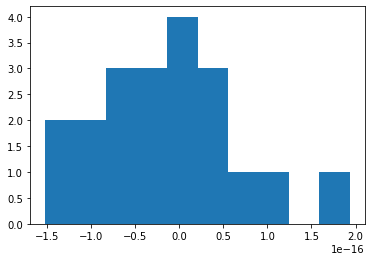

In [116]:
plt.hist(valores_Histo)